In [1]:

!pip install ktrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=d456bd2c77cf2f41a856e220af7a12f8bb9278dd7c2bd8218b51a51431bf1ee6
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2c

##Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/SMSSpamCollection', sep = '\t', names = ['label', 'text'])

df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Data preprocessing is not required

In [5]:
# Splitting data into train and test set


data_train, data_test = train_test_split(df,
                                         test_size = 0.2,
                                         random_state=0)

In [6]:
df.shape, data_train.shape, data_test.shape

((5572, 2), (4457, 2), (1115, 2))

In [7]:
# preprocessing methos is inbuilt in the text (imported from ktrain)

(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df = data_train,
    text_column = 'text',
    label_columns = 'label',
    val_df = data_test,
    preprocess_mode = 'bert'
)  # preprocess_mode can also be supplied as 'distibert'

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [8]:
## use 'ditilbert' if you want

model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc
                             )

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [9]:
# here we have taken batch size as 6 as from the documentation it is recommended to use this maxlen as 500


learner = ktrain.get_learner(model = model,
                             train_data = (X_train, y_train),
                             val_data = (X_test, y_test),
                             batch_size = 6
                             )

In [10]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 460s 588ms/step - loss: 0.2929 - accuracy: 0.9028
Epoch 2/2
743/743 [==============================] - 156s 209ms/step - loss: 1.6841 - accuracy: 0.8101


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss


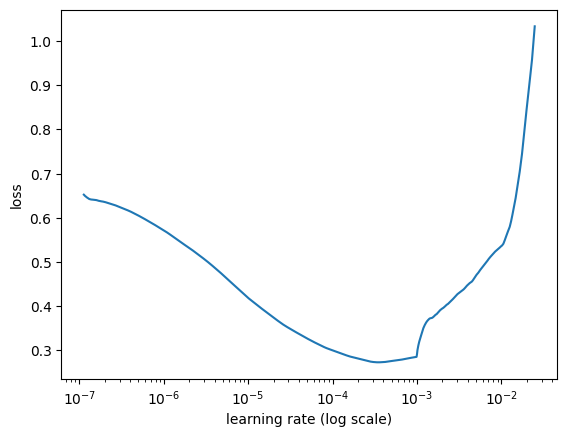

In [11]:
learner.lr_find(show_plot = True, max_epochs = 2)

In [18]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)


predictor = ktrain.get_predictor(learner.model, preproc)

predictor.save('bertspam-classifier')



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 479s 644ms/step - loss: 0.3904 - accuracy: 0.8683 - val_loss: 0.4123 - val_accuracy: 0.8565


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
msg1 = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
msg2 = ["England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+"]
msg3 = "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"

In [20]:
predictor.predict(msg1)

['ham']

In [21]:
predictor.predict(msg2)

['ham']

In [22]:
predictor.predict(msg3)

'ham'